In [1]:
# 라이브러리 호출
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# 사전 훈련된 모델 내려받기
model = ResNet50(include_top=True,
                 weights="imagenet",
                 input_tensor=None,
                 input_shape=None,
                 pooling=None,
                 classes=1000)

102967424/102967424 [==============================] - 9s 0us/step


In [5]:
# ResNet50 네트워크에 밀집층 추가
model.trainable = False
model = Sequential([model,Dense(2, activation='sigmoid')])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 2)                 25638714  
                                                                 
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
Total params: 25,638,720
Trainable params: 6
Non-trainable params: 25,638,714
_________________________________________________________________


In [6]:
# 모델 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
#  훈련 및 검증 데이터 확장 및 전처리
BATCH_SIZE = 32
image_height = 224
image_width = 224

train_dir = "/Users/smk0728/Desktop/D_T_S/data/catanddog/train"


valid_dir = "/Users/smk0728/Desktop/D_T_S/data/catanddog/validation"


train = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=10,
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                  shear_range=0.1,
                  zoom_range=0.1)

train_generator = train.flow_from_directory(train_dir,
                                                    target_size=(image_height, image_width),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=1,
                                                    shuffle=True,
                                                    class_mode="categorical")







valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid.flow_from_directory(valid_dir,
                                                    target_size=(image_height, image_width),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=7,
                                                    shuffle=True,
                                                    class_mode="categorical"
                                                    )
history=model.fit(train_generator,
          epochs=10,
          validation_data=valid_generator,
          verbose=2)

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.
Epoch 1/10
13/13 - 24s - loss: 0.7148 - accuracy: 0.5273 - val_loss: 0.7241 - val_accuracy: 0.5000 - 24s/epoch - 2s/step
Epoch 2/10
13/13 - 7s - loss: 0.7137 - accuracy: 0.5273 - val_loss: 0.7223 - val_accuracy: 0.5000 - 7s/epoch - 508ms/step
Epoch 3/10
13/13 - 6s - loss: 0.7123 - accuracy: 0.5273 - val_loss: 0.7208 - val_accuracy: 0.5000 - 6s/epoch - 495ms/step
Epoch 4/10
13/13 - 7s - loss: 0.7110 - accuracy: 0.5273 - val_loss: 0.7196 - val_accuracy: 0.5000 - 7s/epoch - 523ms/step
Epoch 5/10
13/13 - 6s - loss: 0.7101 - accuracy: 0.5273 - val_loss: 0.7188 - val_accuracy: 0.5000 - 6s/epoch - 495ms/step
Epoch 6/10
13/13 - 7s - loss: 0.7092 - accuracy: 0.5273 - val_loss: 0.7176 - val_accuracy: 0.5000 - 7s/epoch - 511ms/step
Epoch 7/10
13/13 - 6s - loss: 0.7082 - accuracy: 0.5273 - val_loss: 0.7164 - val_accuracy: 0.5000 - 6s/epoch - 492ms/step
Epoch 8/10
13/13 - 7s - loss: 0.7072 - accuracy: 0.5273 - val_loss

Text(0.5, 1.0, '오차')

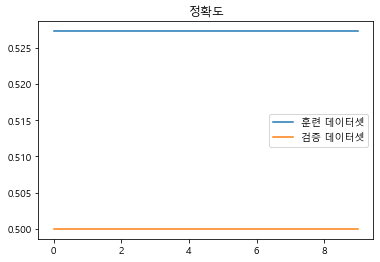

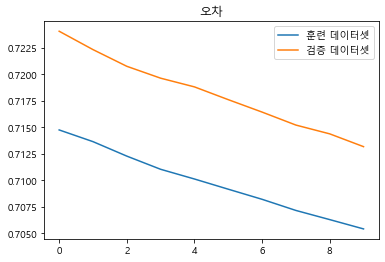

In [17]:
#모델 시각화
#한글깨짐 해결
import matplotlib as mpl
import matplotlib.pylab as plt
from matplotlib import font_manager

font_fname = 'C:/Windows/Fonts/malgun.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()

plt.rcParams["font.family"] = font_family

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label="훈련 데이터셋")
plt.plot(epochs, val_accuracy, label="검증 데이터셋")
plt.legend()
plt.title('정확도')
plt.figure()


plt.plot(epochs, loss, label="훈련 데이터셋")
plt.plot(epochs, val_loss, label="검증 데이터셋")
plt.legend()
plt.title('오차')

1/1 [==============================] - 2s 2s/step


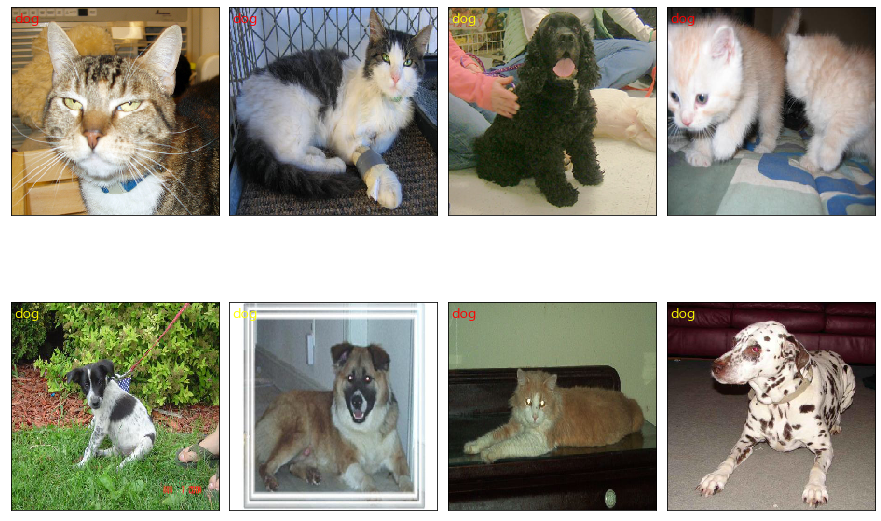

In [18]:
# 모델 예측
class_names = ['cat', 'dog']
validation, label_batch  = next(iter(valid_generator))

prediction_values = model.predict(validation)

prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(validation[i,:],cmap=plt.cm.gray_r, interpolation='nearest')
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)

In [19]:
!pip install tensorflow_hub

In [20]:
# ResNet50 내려 받기
# Dense 층 추가
import tensorflow_hub as hub
model = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/4",
                   input_shape=(224, 224, 3),
                   trainable=False),  
    tf.keras.layers.Dense(2, activation='softmax')
])

In [22]:
# 훈련 및 검증 데이터 확장 및 전처리
# 모델 컴파일
train = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=10,
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                  shear_range=0.1,
                  zoom_range=0.1)

train_generator = train.flow_from_directory(train_dir,
                                                    target_size=(image_height, image_width),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=1,
                                                    shuffle=True,
                                                    class_mode="categorical")

valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid.flow_from_directory(valid_dir,
                                                    target_size=(image_height, image_width),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=7,
                                                    shuffle=True,
                                                    class_mode="categorical"
                                                    )

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [23]:
# 모델 훈련
history=model.fit(train_generator,
          epochs=10,
          validation_data=valid_generator,
          verbose=1)

Epoch 1/10
13/13 [==============================] - 29s 875ms/step - loss: 0.4612 - accuracy: 0.8519 - val_loss: 0.1867 - val_accuracy: 0.9796
Epoch 2/10
13/13 [==============================] - 8s 633ms/step - loss: 0.1180 - accuracy: 0.9740 - val_loss: 0.0840 - val_accuracy: 0.9898
Epoch 3/10
13/13 [==============================] - 8s 626ms/step - loss: 0.0710 - accuracy: 0.9792 - val_loss: 0.0636 - val_accuracy: 0.9898
Epoch 4/10
13/13 [==============================] - 8s 679ms/step - loss: 0.0455 - accuracy: 0.9922 - val_loss: 0.0523 - val_accuracy: 0.9898
Epoch 5/10
13/13 [==============================] - 8s 628ms/step - loss: 0.0365 - accuracy: 0.9922 - val_loss: 0.0486 - val_accuracy: 0.9898
Epoch 6/10
13/13 [==============================] - 8s 622ms/step - loss: 0.0355 - accuracy: 0.9922 - val_loss: 0.0431 - val_accuracy: 0.9898
Epoch 7/10
13/13 [==============================] - 8s 617ms/step - loss: 0.0315 - accuracy: 0.9974 - val_loss: 0.0410 - val_accuracy: 1.0000
Epoch

Text(0.5, 1.0, '오차')

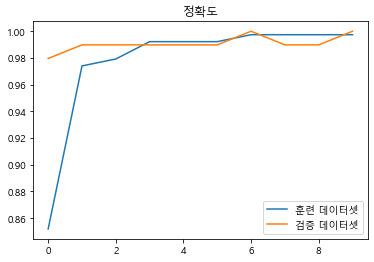

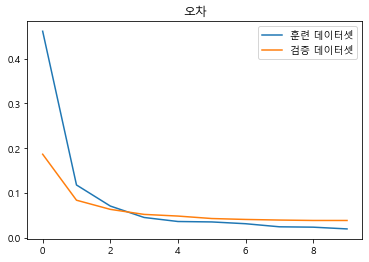

In [24]:
# 모델 시각화
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label="훈련 데이터셋")
plt.plot(epochs, val_accuracy, label="검증 데이터셋")
plt.legend()
plt.title('정확도')
plt.figure()

plt.plot(epochs, loss, label="훈련 데이터셋")
plt.plot(epochs, val_loss, label="검증 데이터셋")
plt.legend()
plt.title('오차')

1/1 [==============================] - 2s 2s/step


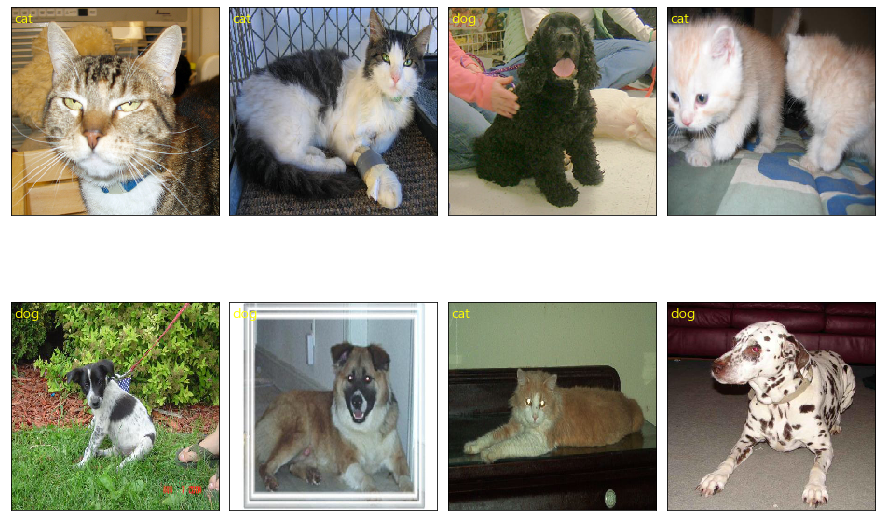

In [25]:
# 모델 예측
class_names = ['cat', 'dog']
validation, label_batch  = next(iter(valid_generator))
prediction_values = model.predict(validation)
prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(validation[i,:],cmap=plt.cm.gray_r, interpolation='nearest')
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)